# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 2 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, лапласа и коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_rvs = norm_distr.rvs(size=N)
laplacian_rvs = laplacian_distr.rvs(size=N)
cauchy_rvs = cauchy_distr.rvs(size=N)

Постройте график плотности распределения для всех трех распределений на одних осях.

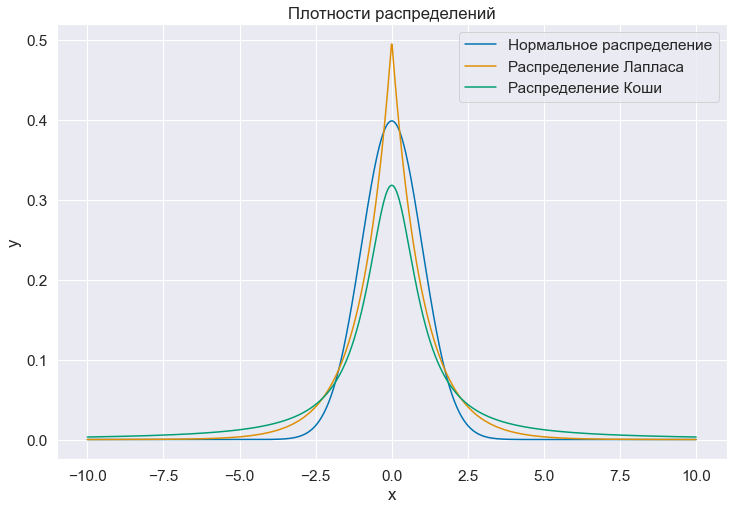

In [3]:
grid = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12, 8))
plt.title('Плотности распределений')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(grid, norm_distr.pdf(grid), color=color_for_normal, label='Нормальное распределение')
plt.plot(grid, laplacian_distr.pdf(grid), color=color_for_laplace, label='Распределение Лапласа')
plt.plot(grid, cauchy_distr.pdf(grid), color=color_for_cauchy, label='Распределение Коши')
plt.legend()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** формально у распределения Коши математичекого ожидания нет, но будем считать его матожиданием ось симметрии функции плотности. В таком случае, тяжелее всего найти именно матожидание распределения Коши, потому что, с одной стороны, в окрестности матожидания плотность распределения Коши меньше, чем у других распределений, а с другой стороны, плотность удалённых от матожидания величин больше.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [4]:
import math

def truncated_mean(sample, alpha=0.3):
    return np.mean(sps.trimboth(sample, alpha))

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [5]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    quantiles = distr.ppf(1 - alpha)
    return 2 * np.array([
        (quad(lambda x: (x ** 2) * distr.pdf(x), 0, distr.ppf(1 - a))[0] + a * (distr.ppf(1 - a) ** 2)) /
        ((1 - 2 * a) ** 2)
        for a, quantile in zip(alpha, quantiles)
    ])

Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для заголовка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

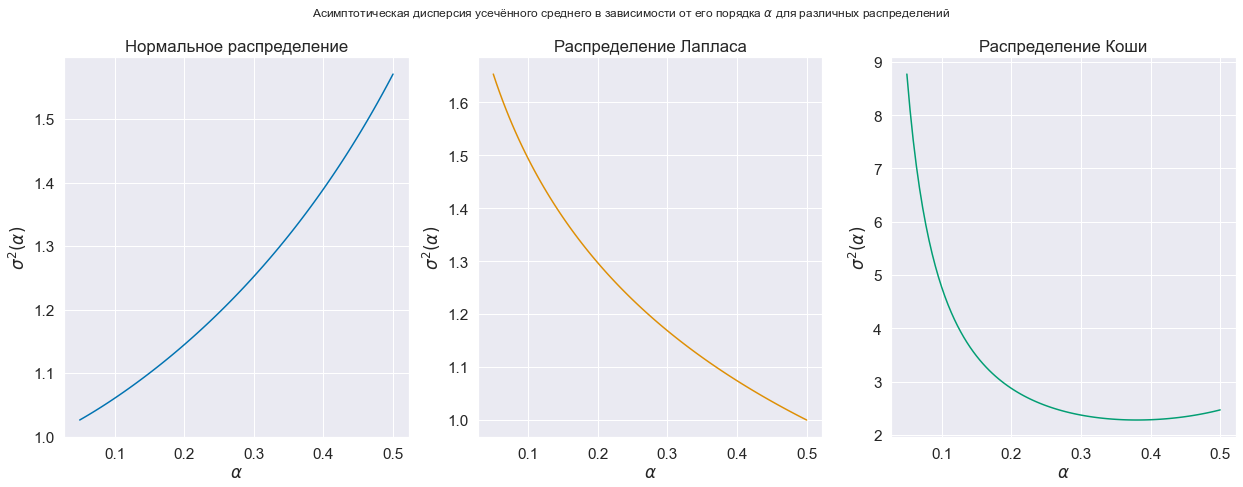

In [6]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

fig, ax = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle(r'Асимптотическая дисперсия усечённого среднего в зависимости от его порядка $\alpha$ для различных распределений')
for axis in ax:
    axis.set_xlabel(r'$\alpha$')
    axis.set_ylabel(r'$\sigma^2(\alpha)$')
    
ax[0].set_title('Нормальное распределение')
ax[0].plot(alpha_grid, asymp_var(norm_distr, alpha_grid), color=color_for_normal)
ax[1].set_title('Распределение Лапласа')
ax[1].plot(alpha_grid, asymp_var(laplacian_distr, alpha_grid), color=color_for_laplace)
ax[2].set_title('Распределение Коши')
ax[2].plot(alpha_grid, asymp_var(cauchy_distr, alpha_grid), color=color_for_cauchy)
plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

Усечённое среднее порядка 0.5 соответствует выборочной медиане.

Усечённое среднее порядка 0 соответствует выборочному среднему.

**Ответ:** У нормального распределения с увеличением $\alpha$ асимптотическая дисперсия усечённого среднего увеличивается, у распределения Лапласа уменшьается, а у распределения Коши сначала резко падает, затем немного возрастает. Это значит, что в случае нормального распределения матождание выгоднее всего оценивать выборочным средним, в случае распределения Лапласа -- медианой, а в случае распределения Коши ни среднее, ни медиана не дают наилучшего результата: наилучший результат даёт именно усечённое среднее  порядка ~0.35

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усеченного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [7]:
def calc_estimates(sample, alpha):
    return {
        'mean': np.cumsum(sample) / np.arange(1, len(sample) + 1),
        'median': np.array([np.median(sample[:i]) for i in range(len(sample))]),
        'trunc_mean': np.array([truncated_mean(sample[:i], alpha) for i in range(len(sample))])
    }

alpha = 0.35
norm_estimates = calc_estimates(norm_rvs, alpha)
laplacian_estimates = calc_estimates(laplacian_rvs, alpha)
cauchy_estimates = calc_estimates(cauchy_rvs, alpha)

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
def plot_estimate(estimate, start, stop, color, linestyle, label):
    plt.plot(np.arange(start, stop), estimate[start - 1:stop - 1], color=color, linestyle=linestyle, label=label)

def plot_estimates(estimates, start, stop, distr_name, color):
    plt.figure(figsize=(12, 8))
    plt.title(r'Зависимость оценок {distr_name} от размера выборки')
    plt.xlabel('Размер выборки')
    plt.xlabel('Величина оценки')
    plot_estimate(estimates['mean'], start, stop, color, '-', 'Выборочное среднее')
    plot_estimate(estimates['median'], start, stop, color, ':', 'Выборочная медиана')
    plot_estimate(estimates['trunc_mean'], start, stop, color, '--', 'Усечённое выборочное среднее порядка 0.35')
    plt.legend()

**Нормальное распределение**

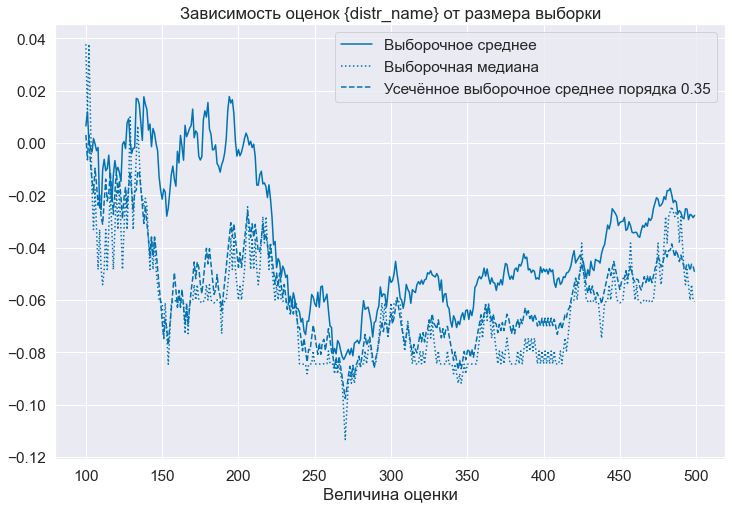

In [9]:
plot_estimates(norm_estimates, 100, 500, 'Нормального распределения', color_for_normal)

**Распределение Лапласа**

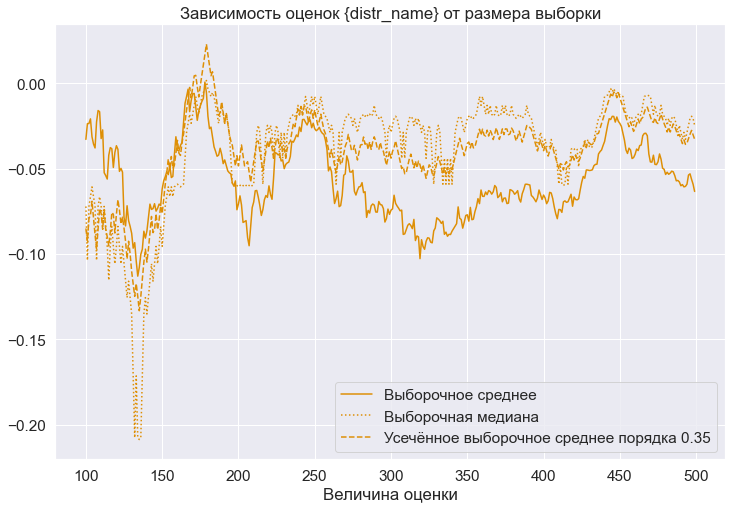

In [10]:
plot_estimates(laplacian_estimates, 100, 500, 'Нормального распределения', color_for_laplace)

**Распределение Коши**

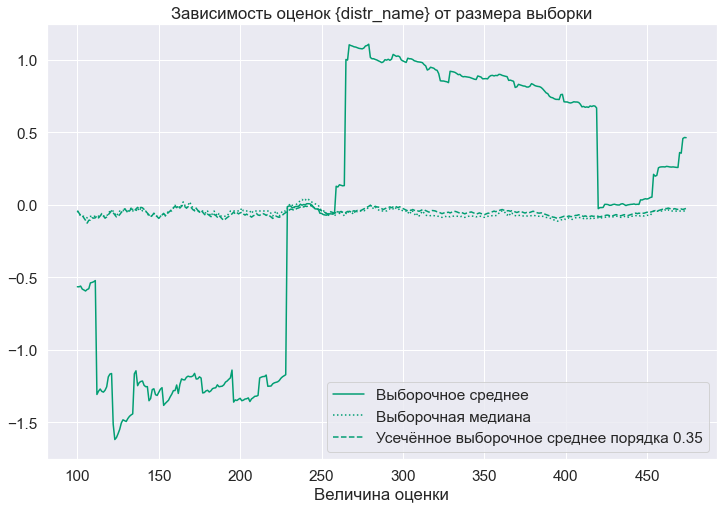

In [11]:
plot_estimates(cauchy_estimates, 100, 475, 'Нормального распределения', color_for_cauchy)

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**

В случае нормального распределения выборочное среднее было ближе всех к истинному значению матожидания (нулю), медиана дальше всех, а усечённое среднее между ними. Это полностью соответствует описанию поведения оценок на графике асимптотической дисперсии усечённого среднего: у выборочного среднего наименьшая дисперсия а у медианы наибольшая.

В случае распределения Лапласа, выборочная медиана была ближе других оценок к истинному значению матожидания: нулю. Выборочное среднее было дальше всех, а усечённое среднее между ними. Это согласуется с графиком асимптотической дисперсии аналогично предыдущему случаю.

В случае распределения Коши выборочное среднее, как и на графике асимптотической дисперсии, оказалось самой нестабильной оценкой, а усечёное среднее поряка 0.35 при больших выборках немного лучше медианы (ближе к 0). Важно отметить, что у распределения Коши нет ни матожидания, ни дисперсии: это оценки центра симметрии (а также максимума) графика плотности распределения.

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [12]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: C:\Users\Lenovo\Documents\Study\5term\MathStat\Pracs\3\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|##########| 101k/101k [00:00<00:00, 367kB/s]
100%|##########| 101k/101k [00:00<00:00, 365kB/s]


In [13]:
import pandas as pd

In [14]:
data = pd.read_csv("winequality-red.csv")

In [15]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [16]:
data['category'] = pd.cut(
    data['alcohol'],
    labels = ['low alcohol', 'medium alcohol', 'high alcohol'],
    bins=[data['alcohol'].min(), 10, 12, data['alcohol'].max()],
    include_lowest=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low alcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,low alcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,medium alcohol
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium alcohol
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium alcohol
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [17]:
data[['category', 'residual sugar']].groupby('category').agg(['mean', 'median'])

residual sugar       
                         mean median
category                            
low alcohol          2.445984    2.1
medium alcohol       2.592264    2.2
high alcohol         2.760993    2.3

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Чем выше содержание алкоголя, тем больше сахара. Так как среднее значительно больше медианы, можно сделать вывод, что есть несколько выбросов в бóльшую сторону (вина с очень высоким содержанием сахара, либо ошибки при сборе данных).

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

<AxesSubplot:xlabel='category', ylabel='residual sugar'>

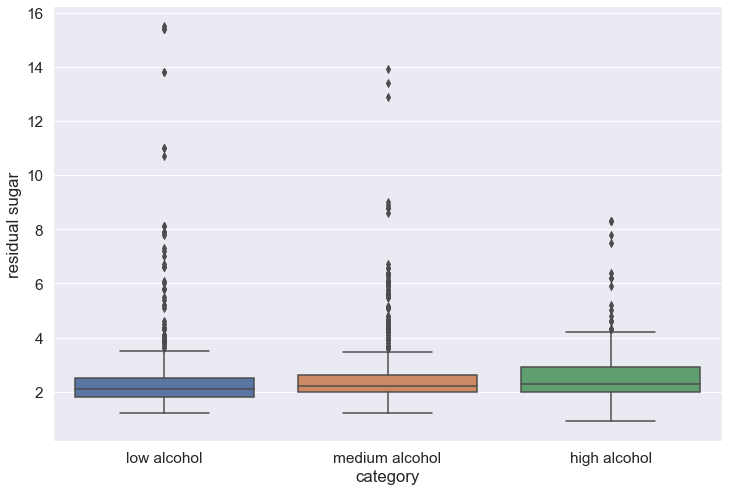

In [18]:
plt.figure(figsize=(12, 8))
palette = sns.color_palette("viridis", n_colors=3)[::-1]
sns.boxplot(data=data, x='category', y='residual sugar')

<AxesSubplot:xlabel='category', ylabel='residual sugar'>

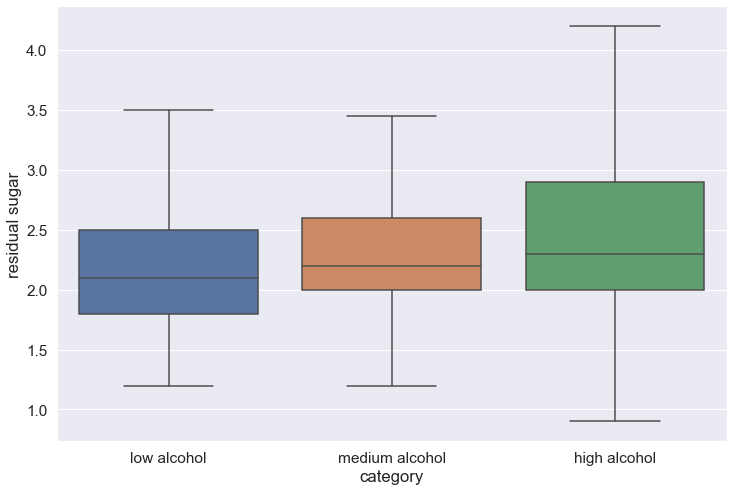

In [19]:
plt.figure(figsize=(12, 8))
palette = sns.color_palette("viridis", n_colors=3)[::-1]
sns.boxplot(data=data, x='category', y='residual sugar', showfliers=False)

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** Действительно, в выборке есть много выбросов, которые значительно больше других значений. Из-за этого для оценки содержания сахара лучше использовать медиану, так как она более устойчива к статистическим выбросам (которых в этой выборке много и они имеют большой вес).

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

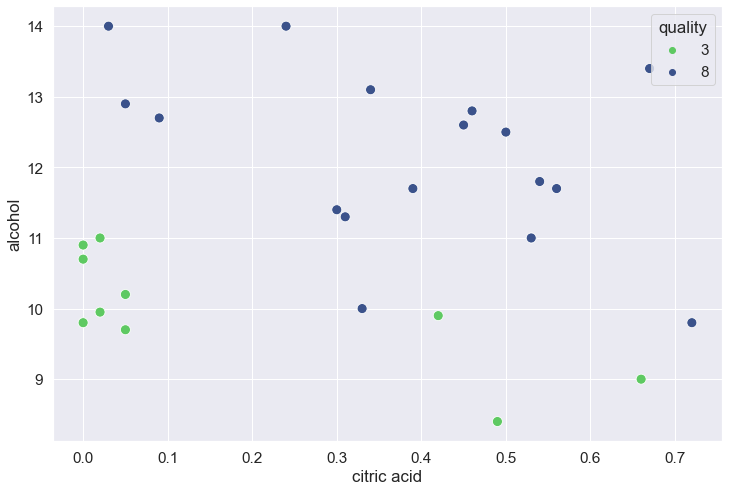

In [20]:
def scatter_wine():
    sns.scatterplot(
        data=data[data['quality'].isin([3, 8])],
        x='citric acid',
        y='alcohol',
        hue='quality',
        palette=[palette[0]]+[palette[-1]],
        s=100
    )

plt.figure(figsize=(12, 8))
scatter_wine()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [21]:
def MLE_multivariate_norm(sample):
    return (np.mean(sample, axis=0).to_numpy(), np.cov(sample, rowvar=0))

def MLE_params_by_quality(sample, quality, params):
    return MLE_multivariate_norm(data[data['quality'] == quality][params])

params = ['citric acid', 'alcohol']

In [22]:
quality3_distr_pdf = sps.multivariate_normal(*MLE_params_by_quality(data, 3, params)).pdf

In [23]:
quality8_distr_pdf = sps.multivariate_normal(*MLE_params_by_quality(data, 8, params)).pdf

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [24]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap = plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

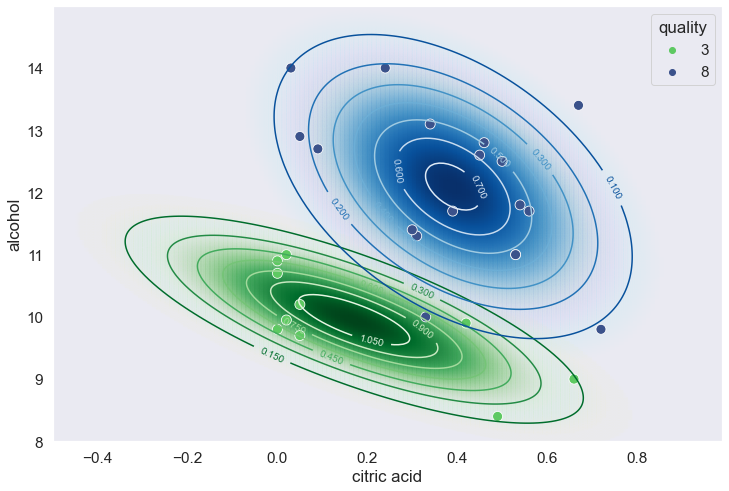

In [25]:
grid = np.mgrid[-0.5:1:0.01, 8:15:0.01]
dstacked_grid = np.dstack(grid)

plt.figure(figsize=(12, 8))
plt.pcolormesh(*grid, quality3_distr_pdf(dstacked_grid), cmap=get_density_cmap('Greens'), shading='gouraud')
plt.pcolormesh(*grid, quality8_distr_pdf(dstacked_grid), cmap=get_density_cmap('Blues'), shading='gouraud')

c3 = plt.contour(*grid, quality3_distr_pdf(dstacked_grid), cmap=get_density_cmap('Greens_r'), alpha=1)
c8 = plt.contour(*grid, quality8_distr_pdf(dstacked_grid), cmap=get_density_cmap('Blues_r'), alpha=1)
plt.clabel(c3)
plt.clabel(c8)
scatter_wine()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** У вин с бóльшим баллом большее содержание алкоголя и лимонной кислоты.

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

In [26]:
n = 1000

In [27]:
step = 0.01
theta_grid = np.arange(0, 1 + step, step)
fisher_info = 1 / (theta_grid * (1 - theta_grid))
cramer_rao_bound = 1 / (n * fisher_info)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


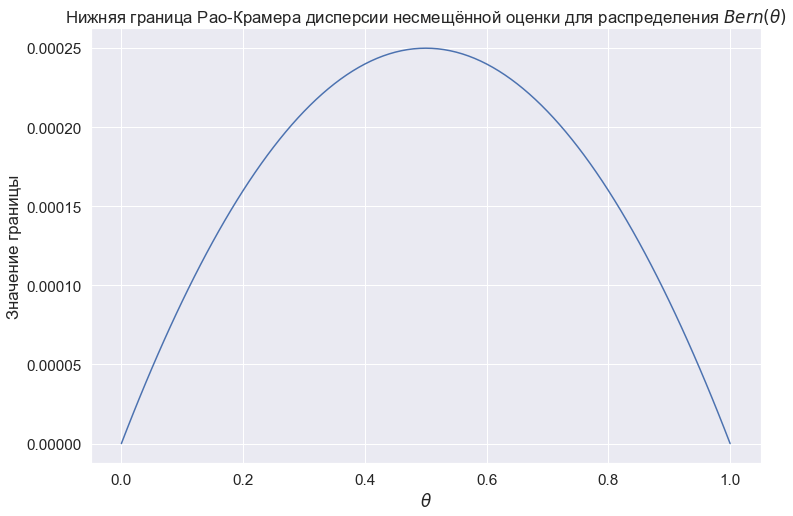

In [28]:
plt.figure(figsize=(12, 8))
plt.title(r'Нижняя граница Рао-Крамера дисперсии несмещённой оценки для распределения $Bern(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'Значение границы')
plt.plot(theta_grid, cramer_rao_bound)

Какой можно сделать вывод (напишите в комментариях)?

**Вывод:** чем ближе параметр распределения Бернулли к 0.5, тем больше граница функции риска (дисперсии) несмещённой оценки. То есть, чем ближе $\theta$ к 0.5, тем тяжелее её оценивать.

 Для каждого значения $\theta$
    (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$,
    посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии
    (количество бутстрепных выборок равно $1000$) этой
    эффективной оценки $\theta$.

In [29]:
bern_samples = np.array([sps.bernoulli.rvs(theta, size=n) for theta in theta_grid])

In [30]:
bern_bootstrap_var_estimates = np.array([
    np.var(np.mean(np.random.choice(sample, size=(n, n)), axis=1))
    for sample in bern_samples
])

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

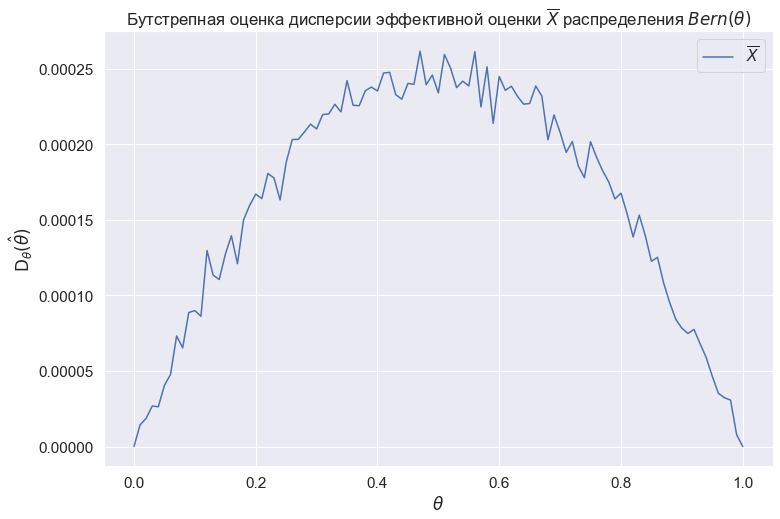

In [31]:
plt.figure(figsize=(12, 8))
plt.title(r'Бутстрепная оценка дисперсии эффективной оценки $\overline{X}$ распределения $Bern(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathsf{D}_\theta(\hat\theta)$')
plt.plot(theta_grid, bern_bootstrap_var_estimates, label=r'$\overline{X}$')
plt.legend()

**Вывод:** график бустрепных оценок дисперсий полностью повторяет форму графика теоретичеческой оценки. В частности, дисперсия достигается максимума в районе $\theta=0.5$.